<a href="https://colab.research.google.com/github/laibashakir/PRODIGY_DataScience_Internship_Tasks/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Create a bar chart or histogram to visualize the distribution of a categorical or continuous variable, such as the distribution of ages or genders in a population.

[Note Selected data Source: https://www.kaggle.com/datasets/mabdullahsajid/population-of-pakistan-dataset ]

*First of all we are going to import some basic libraries will be used for the data visualization*

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os


now we will se the pd.read_csv() function from the pandas library to read a CSV file into a DataFrame CSV file i.e. i.e. "sub-division_population_of_pakistan.csv"

In [ ]:
df =pd.read_csv("/content/sub-division_population_of_pakistan.csv")
df

,PROVINCE,DIVISION,DISTRICT,SUB DIVISION,AREA (sq.km),ALL SEXES (RURAL),MALE (RURAL),FEMALE (RURAL),TRANSGENDER (RURAL),SEX RATIO (RURAL),...,POPULATION 1998 (RURAL),ANNUAL GROWTH RATE (RURAL),ALL SEXES (URBAN),MALE (URBAN),FEMALE (URBAN),TRANSGENDER (URBAN),SEX RATIO (URBAN),AVG HOUSEHOLD SIZE (URBAN),POPULATION 1998 (URBAN),ANNUAL GROWTH RATE (URBAN)
0,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,BAHAWALNAGAR TEHSIL,1729.0,619550,316864,302644,42,104.70,...,407768,2.22,193840,98391,95402,47,103.13,6.02,133785,1.97
1,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,CHISHTIAN TEHSIL,1500.0,540342,273788,266500,54,102.73,...,395983,1.65,149424,75546,73851,27,102.30,6.01,102287,2.01
2,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,FORT ABBAS TEHSIL,2536.0,361240,182655,178541,44,102.30,...,250959,1.93,61528,31360,30150,18,104.01,6.00,34637,3.06
3,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,HAROONABAD TEHSIL,1295.0,382115,192278,189808,29,101.30,...,297343,1.33,142600,71345,71236,19,100.15,6.02,84424,2.79
4,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,MINCHINABAD TEHSIL,1818.0,452723,231506,221178,39,104.67,...,316593,1.90,72294,36694,35590,10,103.10,6.34,37668,3.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,KPK/FATA,DERA ISMAIL KHAN DIVISION,SOUTH WAZIRISTAN DISTRICT,SARAROGHA TEHSIL,813.0,98180,51479,46694,7,110.25,...,72063,1.64,0,0,0,0,0.00,0.00,0,0.00
524,KPK/FATA,DERA ISMAIL KHAN DIVISION,SOUTH WAZIRISTAN DISTRICT,SERWEKAI TEHSIL,398.0,54540,28695,25844,1,111.03,...,31472,2.93,0,0,0,0,0.00,0.00,0,0.00
525,KPK/FATA,DERA ISMAIL KHAN DIVISION,SOUTH WAZIRISTAN DISTRICT,TIARZA TEHSIL,734.0,45156,23649,21507,0,109.96,...,37708,0.95,0,0,0,0,0.00,0.00,0,0.00
526,KPK/FATA,DERA ISMAIL KHAN DIVISION,SOUTH WAZIRISTAN DISTRICT,TOI KHULLA TEHSIL,567.0,50413,27462,22947,4,119.68,...,36508,1.71,0,0,0,0,0.00,0.00,0,0.00


We can note that there are many columns that are of no use to us for example to find the gender distribution in rural and urban areas we do not need the name of the province, district, sub-district, its areas and sex ratio . so we will use the df.drop() to remove them from our data to make it clean


In [ ]:
df.drop(['PROVINCE',	'DIVISION'	,'DISTRICT'	,'SUB DIVISION',	'AREA (sq.km)', 'SEX RATIO (RURAL)',	'POPULATION 1998 (RURAL)',	'ANNUAL GROWTH RATE (RURAL)','AVG HOUSEHOLD SIZE (RURAL)',	 'SEX RATIO (URBAN)',	'AVG HOUSEHOLD SIZE (URBAN)',	'POPULATION 1998 (URBAN)',	'ANNUAL GROWTH RATE (URBAN)'], axis=1, inplace=False)

,ALL SEXES (RURAL),MALE (RURAL),FEMALE (RURAL),TRANSGENDER (RURAL),ALL SEXES (URBAN),MALE (URBAN),FEMALE (URBAN),TRANSGENDER (URBAN)
0,619550,316864,302644,42,193840,98391,95402,47
1,540342,273788,266500,54,149424,75546,73851,27
2,361240,182655,178541,44,61528,31360,30150,18
3,382115,192278,189808,29,142600,71345,71236,19
4,452723,231506,221178,39,72294,36694,35590,10
...,...,...,...,...,...,...,...,...
523,98180,51479,46694,7,0,0,0,0
524,54540,28695,25844,1,0,0,0,0
525,45156,23649,21507,0,0,0,0,0
526,50413,27462,22947,4,0,0,0,0


so we get the cleaned data. That is cleaned from all the "not needed" data columns we can now work on it more easily. Now we will visualize the data for all the three genders for rural and urban areas of pakistan.


In [ ]:
gender_categories= ['Male', 'Female','Transgenders']

#now we will create a new data frame with columns for each gender category in rural areas
df_rural=df[['MALE (RURAL)','FEMALE (RURAL)',	'TRANSGENDER (RURAL)']].copy()
df_rural.columns= gender_categories

total_population_of_rural_areas = df_rural.sum()


now we will create a bar chart for the genders in rural areas for
pakistan

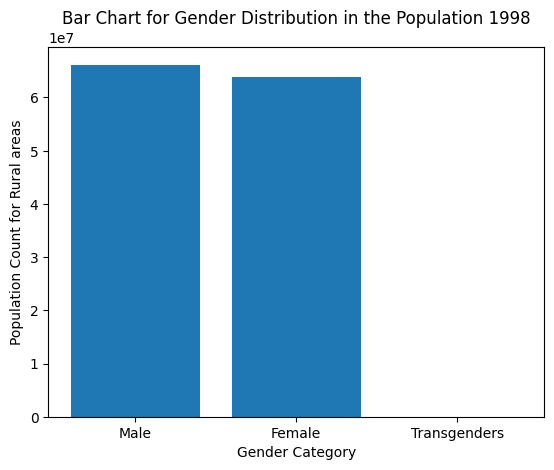

In [ ]:
bars =plt.bar(gender_categories, total_population_of_rural_areas)
plt.xlabel('Gender Category')
plt.ylabel('Population Count for Rural areas')
plt.title('Bar Chart for Gender Distribution in the Population 1998')
plt.show()

The format shows that the values were big so let's find out the value of each bar i.e. the genders of rural areas

In [ ]:
values = [bar.get_height() for bar in bars]

print(values)

[66145563, 63879631, 9596]


Now we will similarly find the **population for each gender** in all the **urban areas of pakistan **

In [ ]:
gender_categories= ['Male', 'Female','Transgenders']

#now we will create a new data frame with columns for each gender category in urban areas
df_urban=df[['MALE (URBAN)','FEMALE (URBAN)',	'TRANSGENDER (URBAN)']].copy()
df_urban.columns= gender_categories

total_population_of_urban_areas = df_urban.sum()


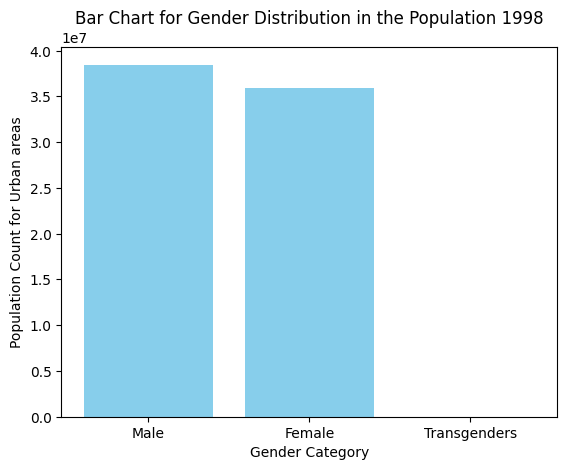

In [ ]:
bars_urban =plt.bar(gender_categories, total_population_of_urban_areas,color='skyblue')
plt.xlabel('Gender Category')
plt.ylabel('Population Count for Urban areas')
plt.title('Bar Chart for Gender Distribution in the Population 1998')
plt.show()

The format shows that the values were big so let's find out the value of each bar i.e. the genders of urban areas

In [ ]:
values = [bar.get_height() for bar in bars_urban]

print(values)

[38461308, 35902873, 11762]


# **Conclusion:**
we have visualized the population of genders for urban and rural areas of pakistan, using Bar graph.